# TRIAL
In this notebook, we are gonna include all the plots from the Needs-model part (SAT matrices and Decays) as well as the Results from the Trial. 

## 1.  SAT MATRICES

First, we are going to create the SAT (n,a) matrices for each status. Let's decide which values for each status. 
The methodology we are going to follow is the next one: choose those actions that are related with each need, and the most important one will be assigned the max value: 1, and the rest the minimum:0. Once we have done this, the intermediate entries are filled orientatively for each status, although later on we will need to tune this value. 

In [1]:
#SAT
needs_list = ["food", "shelter", "sleep", "health", "clothing", "financial security", "employment", "education", "family", "friendship", "intimacy", "freedom", "status", "self-esteem"]
actions_dict = {
        'retired': ["go_home", "go_grocery", "go_hospital", "go_shopping", "go_leisure", "steal_food", "steal_clothes", "go_prison"],
        'employed': ["go_home", "go_grocery", "go_hospital", "go_shopping", "go_leisure", "steal_food", "steal_clothes", "go_prison"], #"go_work",
        'unemployed': ["go_home", "go_grocery", "go_hospital", "go_shopping", "go_leisure", "steal_food", "steal_clothes", "go_prison", "invest_education"],
        'student': ["go_home", "go_grocery", "go_hospital", "go_shopping", "go_leisure", "steal_food", "steal_clothes", "go_prison"], #"go_study",
        'homeless': ["go_grocery","go_hospital", "go_shopping", "go_leisure", "invest_education", "sleep_street", "beg", "steal_food", "steal_clothes", "go_reception_center", "go_prison"]
        }

SAT_matrices = {}

for status, actions in actions_dict.items():
    SAT_matrix = [[0.0 for _ in range(len(actions))] for _ in range(len(needs_list))]
    for i, need in enumerate(needs_list):
        for j, action in enumerate(actions):
            # Assign specific SAT values based on need-action pairs
            # tunegem per diferenciar employed de retired

            # FOOD
            if need == "food" and action == "go_grocery":
                SAT_matrix[i][j] = 1.0
            if need == "food" and action == "go_home":
                SAT_matrix[i][j] = 0.15
            elif need == "food" and action == "steal_food":
                SAT_matrix[i][j] = 0.4
            elif need == "food" and action == "go_reception_center":
                SAT_matrix[i][j] = 0.5
            elif need == "food" and action == "beg":
                SAT_matrix[i][j] = 0.15
            elif need == "food" and action == "go_leisure":
                SAT_matrix[i][j] = 0.4
        

            # SHELTER
            if need == "shelter" and action == "go_home":
                SAT_matrix[i][j] = 1.0
            elif need == "shelter" and action == "go_reception_center":
                SAT_matrix[i][j] = 0.9
            
            # SLEEP
            if need == "sleep" and action == "go_home":
                SAT_matrix[i][j] = 0.2
            elif need == "sleep" and action == "sleep_street":
                SAT_matrix[i][j] = 0.7
            
            # CLOTHING
            if need == "clothing" and action == "go_shopping":
                SAT_matrix[i][j] = 1.0
            elif need == "clothing" and action == "steal_clothes":
                SAT_matrix[i][j] = 0.4

            # HEALTH
            if need == "health" and action == "go_hospital":
                SAT_matrix[i][j] = 1.0
            elif need == "health" and action == "go_grocery":
                SAT_matrix[i][j] = 0.3
            if status == "retired":
                if need == "health" and action == "go_hospital":
                    SAT_matrix[i][j] = 0.9

            # FINANCIAL SECURITY and EMPLOYMENT and EDUCATION
            #if need in ["financial security", "employment", "education"] and (action == "go_work" or action == "invest_education"):
                #SAT_matrix[i][j] = 1.0
            if need in ["financial security", "employment"] and action  in ["invest_education", "beg"]:
                SAT_matrix[i][j] = 0.5
            elif need == "education" and action == "invest_education":
                SAT_matrix[i][j] = 1.0
            if status == "homeless":
                if need in ["financial security", "employment"] and action == "beg":
                    SAT_matrix[i][j] = 0.8

            # FAMILY and FRIENDSHIP
            if need == "family" and action == "go_home":
                SAT_matrix[i][j] = 0.8
            if status != "homeless": 
                if need == "family" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.3
                if need == "friendship" and action == "go_leisure":
                    SAT_matrix[i][j] = 1.0
            elif status == "homeless":
                if need == "friendship" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.4
            #elif need == "friendship" and action == "go_work":
                #SAT_matrix[i][j] = 0.2
            #elif need == "friendship" and action == "go_study":
                #SAT_matrix[i][j] = 0.3

            # INTIMACY
            if need == "intimacy" and action == "go_home":
                SAT_matrix[i][j] = 0.8
            elif need == "intimacy" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.5
            if status == "employed":
                if need == "intimacy" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.7
            elif status == "student":
                if need == "intimacy" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.8
            elif status == "homeless":
                if need == "intimacy" and action == "go_reception_center":
                    SAT_matrix[i][j] = 0.4
                elif need == "intimacy" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.1

            # FREEDOM
            if need == "freedom" and action == "go_home":
                SAT_matrix[i][j] = 0.15
            elif need == "freedom" and action == "go_leisure":
                SAT_matrix[i][j] = 0.7
            elif need == "freedom" and action == "beg":
                SAT_matrix[i][j] = 0.6
            if status != "retired" and status != "homeless":
                if need == "freedom" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.9
            if status == "homeless":
                if need == "freedom" and action == "invest_education":
                    SAT_matrix[i][j] = 0.4
            

            # STATUS
            if need == "status" and action == "go_work":
                SAT_matrix[i][j] = 0.19
            elif need == "status" and action == "go_leisure":
                SAT_matrix[i][j] = 0.7
            elif need == "status" and action == "beg":
                SAT_matrix[i][j] = 0.6
            elif need == "status" and action == "invest_education":
                    SAT_matrix[i][j] = 0.5
            if status == "homeless":
                if need == "status" and action == "invest_education":
                    SAT_matrix[i][j] = 0.6
            elif status == "unemployed":
                if need == "status" and action == "invest_education":
                    SAT_matrix[i][j] = 0.7

            # SELF-ESTEEM
            if need == "self-esteem" and (action == "go_leisure" or action == "go_shopping" or action == "go_work"):
                SAT_matrix[i][j] = 0.5
            if status == "student":
                if need == "self-esteem" and action == "go_shopping":
                    SAT_matrix[i][j] = 0.7
                elif need == "self-esteem" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.6
            elif status != "student":
                if need == "self-esteem" and action == "go_shopping":
                    SAT_matrix[i][j] = 0.5
            elif status == "employed":
                if need == "self-esteem" and action == "go_leisure":
                    SAT_matrix[i][j] = 0.6
            elif status == "unemployed":
                if need == "self-esteem" and action == "invest_education":
                    SAT_matrix[i][j] = 0.4

    SAT_matrices[status] = SAT_matrix

# Needs
needs = {
    'physiological': {
        'needs': ['food', 'shelter', 'sleep', 'health'],
        'weight': 0.85,
        'decaying': {
            'retired': [0.825, 0.92, 0.91, 0.77],
            'employed': [0.822, 0.95, 0.93, 0.9993],
            'unemployed': [0.822, 0.95, 0.94, 0.9993],
            'homeless': [0.82, 0.90, 0.92, 0.999],
            'student': [0.81, 0.95, 0.96, 0.9995]
        },
        'mean and var': (0.7, 0.2)
    },
    'safety': {
        'needs': ['clothing', 'financial security', 'employment', 'education'],
        'weight': 0.8,
        'decaying': {
            'retired': [0.9998, 0.995, 0.999, 0.998],
            'employed': [0.9982, 0.999, 0.9992, 0.998],
            'unemployed': [0.9983, 0.991, 0.995, 0.991],
            'homeless': [0.9983, 0.999, 0.99, 0.995],
            'student': [0.998, 0.993, 0.997, 0.991]
        },
        'mean and var': (0.8, 0.4)
    },
    'belonging': {
        'needs': ['family', 'friendship', 'intimacy'],
        'weight': 0.75,
        'decaying': {
            'retired': [0.8, 0.97, 0.98],
            'employed': [0.91, 0.86, 0.98],
            'unemployed': [0.91, 0.87, 0.98],
            'homeless': [0.91, 0.995, 0.98],
            'student': [0.95, 0.85, 0.9]
        },
        'mean and var': (0.6, 0.4)
    },
    'esteem': {
        'needs': ['freedom', 'status', 'self-esteem'],
        'weight': 0.7,
        'decaying': {
            'retired': [0.99, 0.99, 0.99],
            'employed': [0.95, 0.99, 0.98],
            'unemployed': [0.99, 0.99, 0.97],
            'homeless': [0.99, 0.99, 0.99],
            'student': [0.9, 0.99, 0.8]
        },
        'mean and var': (0.7, 0.4)
    }
}


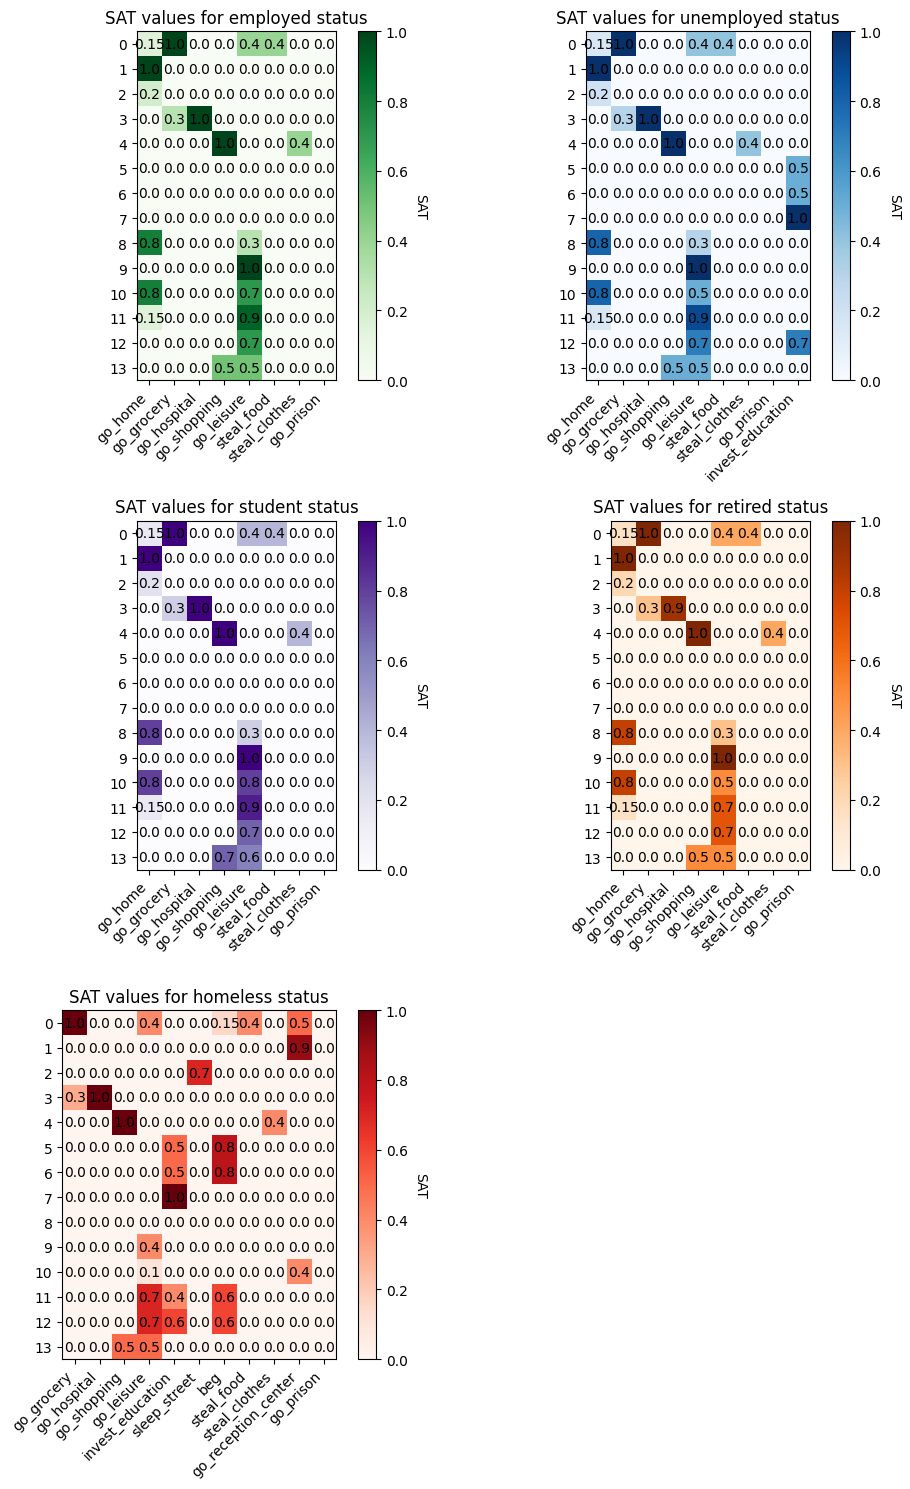

In [358]:
import matplotlib.pyplot as plt
import numpy as np

statuses = ['employed', 'unemployed', 'student', 'retired', 'homeless']

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

cmap_colors = ['Greens', 'Blues', 'Purples', 'Oranges', 'Reds']
cmap_labels = ['employed', 'unemployed', 'student', 'retired', 'homeless']

for i, status in enumerate(statuses[:-1]):
    row = i // 2
    col = i % 2

    selected_matrix = SAT_matrices[status]
    actions = actions_dict[status]

    ax = axs[row, col]
    im = ax.imshow(selected_matrix, cmap=cmap_colors[i])

    ax.set_xticks(np.arange(len(actions)))
    ax.set_yticks(range(len(needs_list)))
    ax.set_xticklabels(actions, rotation=45, ha='right')

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("SAT", rotation=-90, va="bottom")

    for j in range(len(needs_list)):
        for k in range(len(actions)):
            text = ax.text(k, j, selected_matrix[j][k], ha="center", va="center", color="black")

    ax.set_title("SAT values for " + status + " status")

# Add the plot for "homeless" status
selected_matrix = SAT_matrices['homeless']
actions = actions_dict['homeless']
ax = axs[2, 0]
im = ax.imshow(selected_matrix, cmap='Reds')

ax.set_xticks(np.arange(len(actions)))
ax.set_yticks(range(len(needs_list)))
ax.set_xticklabels(actions, rotation=45, ha='right')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("SAT", rotation=-90, va="bottom")

for j in range(len(needs_list)):
    for k in range(len(actions)):
        text = ax.text(k, j, selected_matrix[j][k], ha="center", va="center", color="black")

ax.set_title("SAT values for homeless status")

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust the spacing between subplots
fig.tight_layout()

plt.show()


El que hauriem de fer és seleccionar els decays i valors de la SAT per a que tinguin sentit i per ferho anem a simular-ho de manera esquemàtica per veure com evolucionen els NSL dels needs principals a tenir en compte en aquesta primera aproximació de model: shelter, belonging, food. Aquests corresponen als needs amb major relació amb les funcions que volem que executin els agents primordialment: go_home, go_leisure, go_grocery. 

Puc mirar com dismuneixen naturalment els nsl per començar, després els scores totals en el temps de just aquestes accions.

## 2. NSL DECAYS COMPARISON

Now let's try to see the behaviour of the NSL function in order to know the accurate value for each need taking into account the temporarity of the simulation. 

In [369]:
needs = {
    'physiological': {
        'needs': ['food', 'shelter', 'sleep', 'health'],
        'weight': 0.85,
        'decaying': {
            'retired': [0.825, 0.92, 0.91, 0.77],
            'employed': [0.822, 0.95, 0.93, 0.9993],
            'unemployed': [0.822, 0.95, 0.94, 0.9993],
            'homeless': [0.82, 0.90, 0.92, 0.999],
            'student': [0.81, 0.95, 0.96, 0.9995]
        },
        'mean and var': (0.7, 0.2)
    },
    'safety': {
        'needs': ['clothing', 'financial security', 'employment', 'education'],
        'weight': 0.8,
        'decaying': {
            'retired': [0.9998, 0.995, 0.999, 0.998],
            'employed': [0.9982, 0.999, 0.9992, 0.998],
            'unemployed': [0.9983, 0.991, 0.995, 0.991],
            'homeless': [0.9983, 0.999, 0.99, 0.995],
            'student': [0.998, 0.993, 0.997, 0.991]
        },
        'mean and var': (0.8, 0.4)
    },
    'belonging': {
        'needs': ['family', 'friendship', 'intimacy'],
        'weight': 0.75,
        'decaying': {
            'retired': [0.8, 0.97, 0.98],
            'employed': [0.91, 0.86, 0.98],
            'unemployed': [0.91, 0.87, 0.98],
            'homeless': [0.91, 0.995, 0.98],
            'student': [0.95, 0.85, 0.9]
        },
        'mean and var': (0.6, 0.4)
    },
    'esteem': {
        'needs': ['freedom', 'status', 'self-esteem'],
        'weight': 0.7,
        'decaying': {
            'retired': [0.99, 0.99, 0.99],
            'employed': [0.95, 0.99, 0.98],
            'unemployed': [0.99, 0.99, 0.97],
            'homeless': [0.99, 0.99, 0.99],
            'student': [0.9, 0.99, 0.8]
        },
        'mean and var': (0.7, 0.4)
    }
}


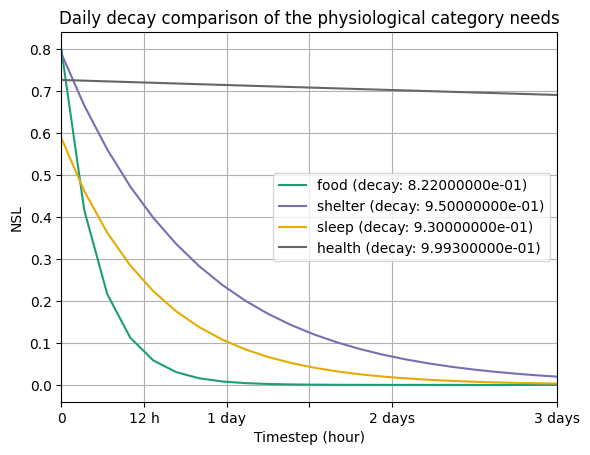

In [392]:
physiological_needs = needs['physiological']['needs']
employed_decay = needs['physiological']['decaying']['employed']
time = np.linspace(0, 5000, 1500) # Adjusted according to the model

cmap = plt.get_cmap('Dark2')
colors = cmap(np.linspace(0, 1, len(physiological_needs)))
for need, decay, color in zip(physiological_needs, employed_decay, colors):
    nsl_initial_value = np.clip(np.random.normal(0.7, np.sqrt(0.2)), 0.5, 0.8)  # Generate a separate initial value for each need
    nsl_values = decay ** time * nsl_initial_value
    label = f'{need} (decay: {decay:.8e})'  # Include decay in the legend label with long float format
    plt.plot(time, nsl_values, label=label, color=color)

time = [0, 12, 24, 36, 48, 72]
plt.xlim(0, 15)

plt.xticks(time, ['0', '12 h', '1 day', '', '2 days', '3 days'])
plt.title('NSL values for the Physiological Needs (Employed)')
plt.xlabel('Timestep (hour)')
plt.ylabel('NSL')
plt.legend()
plt.grid(True)
plt.title('Daily decay comparison of the physiological category needs')
plt.show()


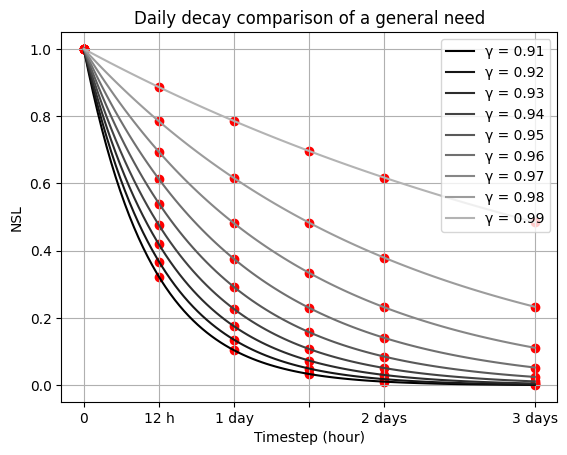

In [162]:
# DECAYS COMPARISON DAILY ORDER 0.9

#ORDER 0.99999
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X = [0, 12, 24, 36, 48, 72]
DECAYS = [0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91]

# Reverse the order of DECAYS
DECAYS.reverse()

# Create an array of X values for plotting
x_values = np.linspace(0, max(X), 100)

# Plotting the lines with gradient coloring
cmap = cm.gray(np.linspace(0, 0.7, len(DECAYS)))  # Create a gradient colormap

for decay, color in zip(DECAYS, cmap):
    y_values = 1.0 * decay**x_values
    plt.plot(x_values, y_values, label=f"γ = {decay}", color=color)

# Add markers at specific X points
for x in X:
    y = 1.0 * np.array(DECAYS)**x
    plt.scatter([x]*len(DECAYS), y, color='red')
# Set the x-axis ticks and labels for specific X points
plt.xticks(X, ['0', '12 h', '1 day', '', '2 days', '3 days'])
plt.xlabel('Timestep (hour)')
plt.ylabel('NSL')
plt.legend()
plt.grid(True)
plt.title('Daily decay comparison of a general need')
plt.show()

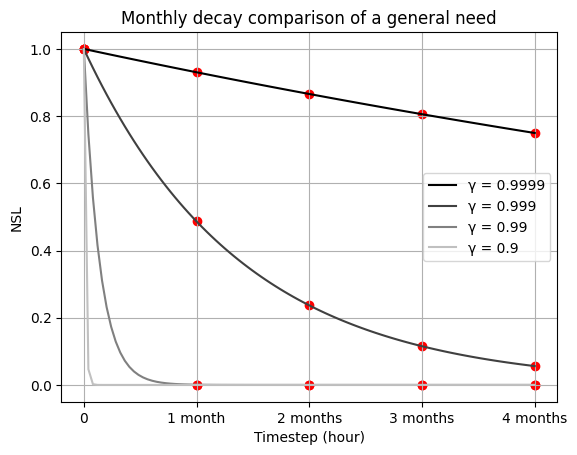

In [64]:
# DECAYS COMPARISON ORDER 0.99999
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X = [0, 720, 1440, 2160, 2880]
DECAYS = [0.9, 0.99, 0.999, 0.9999, 0.99999]

# Reverse the order of DECAYS
DECAYS.reverse()

# Create an array of X values for plotting
x_values = np.linspace(0, max(X), 100)

# Plotting the lines with gradient coloring
cmap = cm.gray(np.linspace(0, 1, len(DECAYS)))  # Create a gradient colormap
DECAYS = [0.9, 0.99, 0.999, 0.9999]
DECAYS.reverse()
for decay, color in zip(DECAYS, cmap):
    y_values = 1.0 * decay**x_values
    plt.plot(x_values, y_values, label=f"γ = {decay}", color=color)

# Add markers at specific X points
for x in X:
    y = 1.0 * np.array(DECAYS)**x
    plt.scatter([x]*len(DECAYS), y, color='red')
# Set the x-axis ticks and labels for specific X points
plt.xticks(X, ['0', '1 month', '2 months', '3 months', '4 months'])
plt.xlabel('Timestep (hour)')
plt.ylabel('NSL')
plt.legend()
plt.grid(True)
plt.title('Monthly decay comparison of a general need')
plt.show()

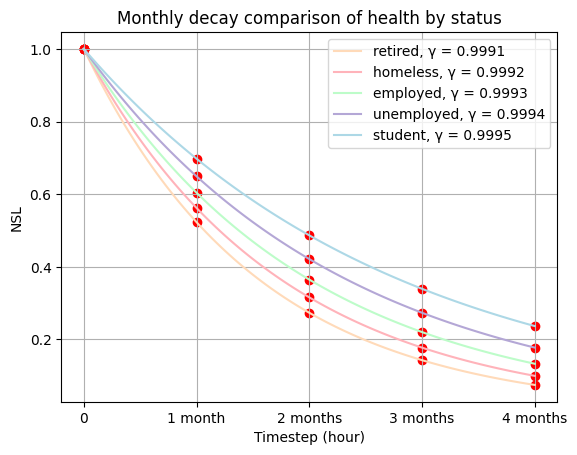

In [73]:
import numpy as np
import matplotlib.pyplot as plt

X = [0, 720, 1440, 2160, 2880]
DECAYS = [0.9991, 0.9992, 0.9993, 0.9994, 0.9995]
STATUS = ["retired", "homeless", "employed", "unemployed", "student"]
COLORS = ["#FFDAB9", "#FFB3BA", "#BDFCC9", "#B4A7D6", "lightblue"]

# Create an array of X values for plotting
x_values = np.linspace(0, max(X), 100)

# Plotting the lines with manual colors and gamma values
for decay, status, color in zip(DECAYS, STATUS, COLORS):
    y_values = 1.0 * decay**x_values
    plt.plot(x_values, y_values, label=f"{status}, γ = {decay}", color=color)

# Add markers at specific X points
for x in X:
    y = 1.0 * np.array(DECAYS)**x
    plt.scatter([x]*len(DECAYS), y, color='red')

# Set the x-axis ticks and labels for specific X points
plt.xticks(X, ['0', '1 month', '2 months', '3 months', '4 months'])
plt.xlabel('Timestep (hour)')
plt.ylabel('NSL')
plt.legend()
plt.grid(True)
plt.title('Monthly decay comparison of health by status')
plt.show()


##  3. Results TRIAL: NSL, Actions and Wealth

Let's import the csv file obtained from the execution of the model with N=5 and T=3000, and plot the different magnitudes which will allow us to achieve a correct parameter fitting. The graphics below correspond to the NSL evolution of all the needs within each category.

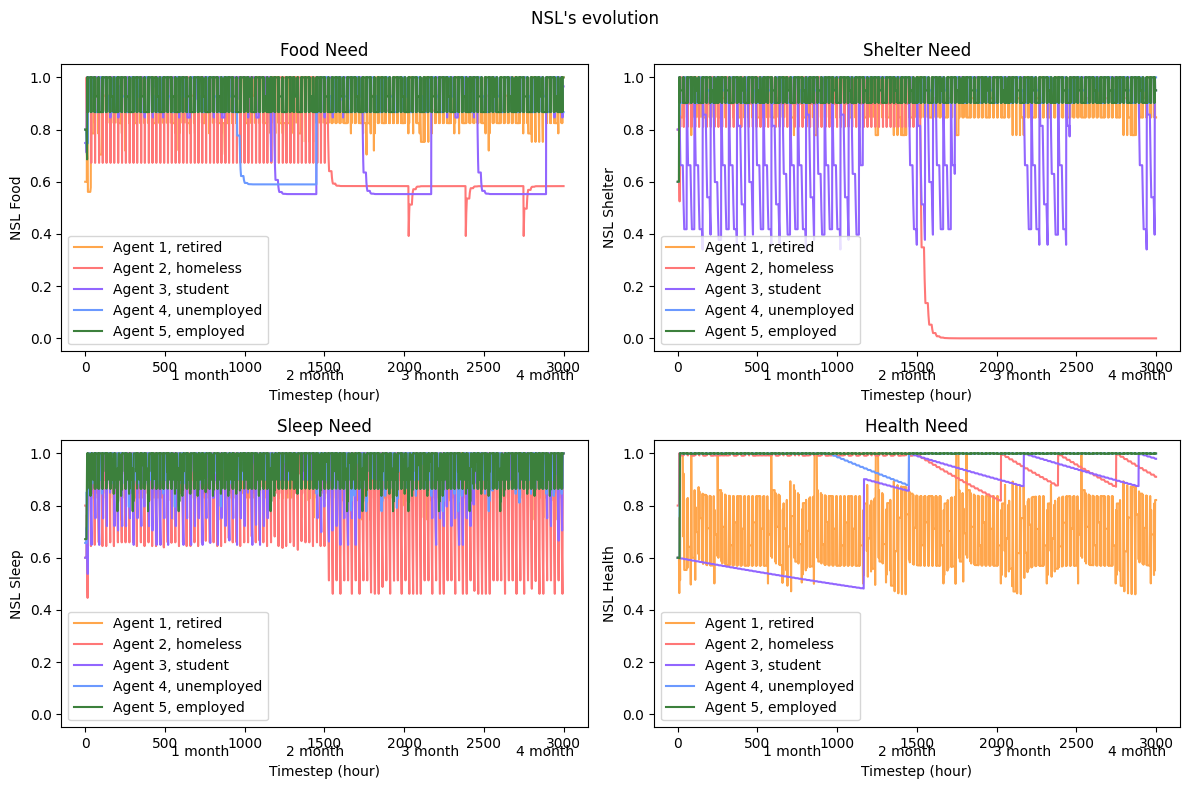

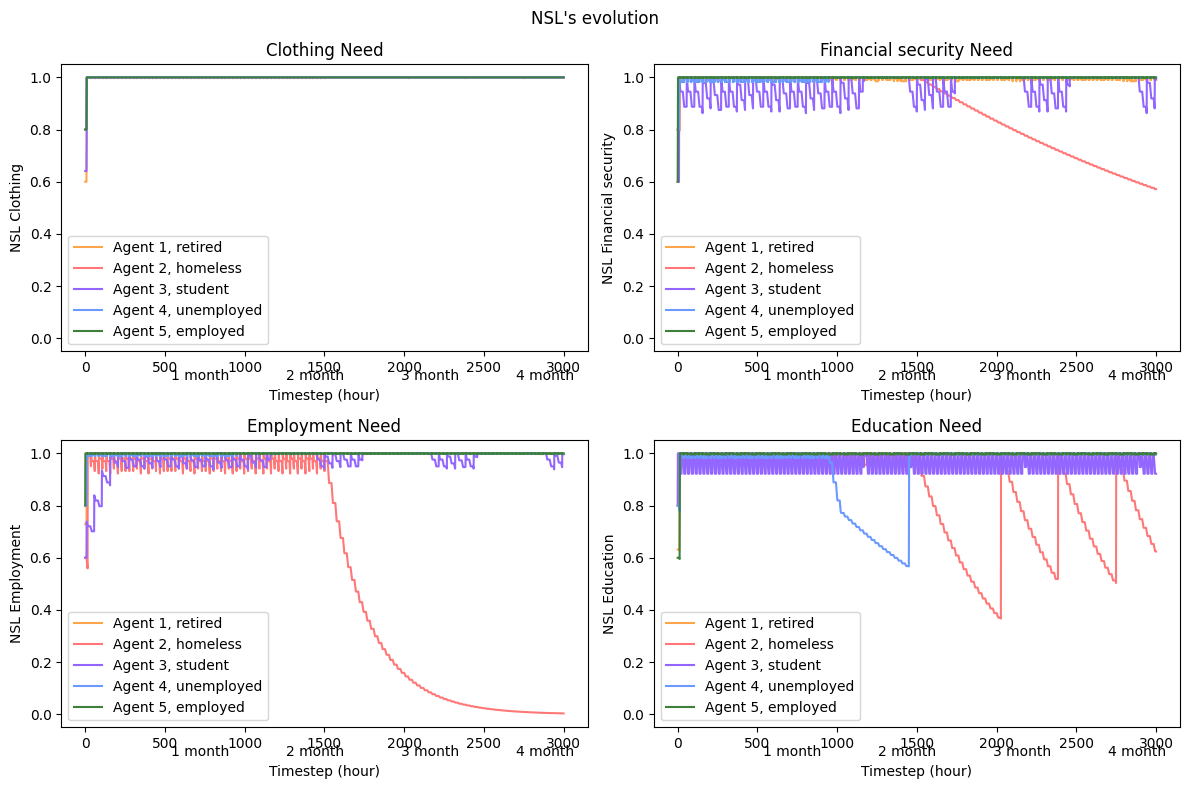

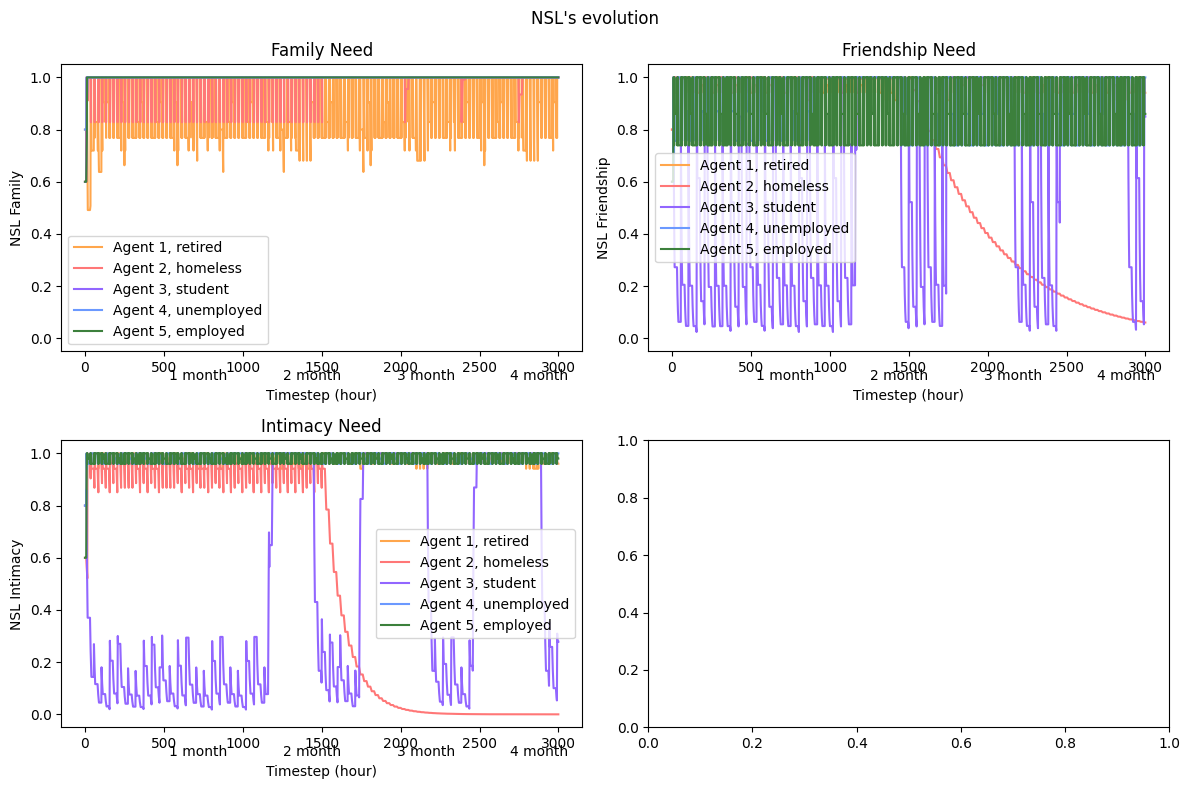

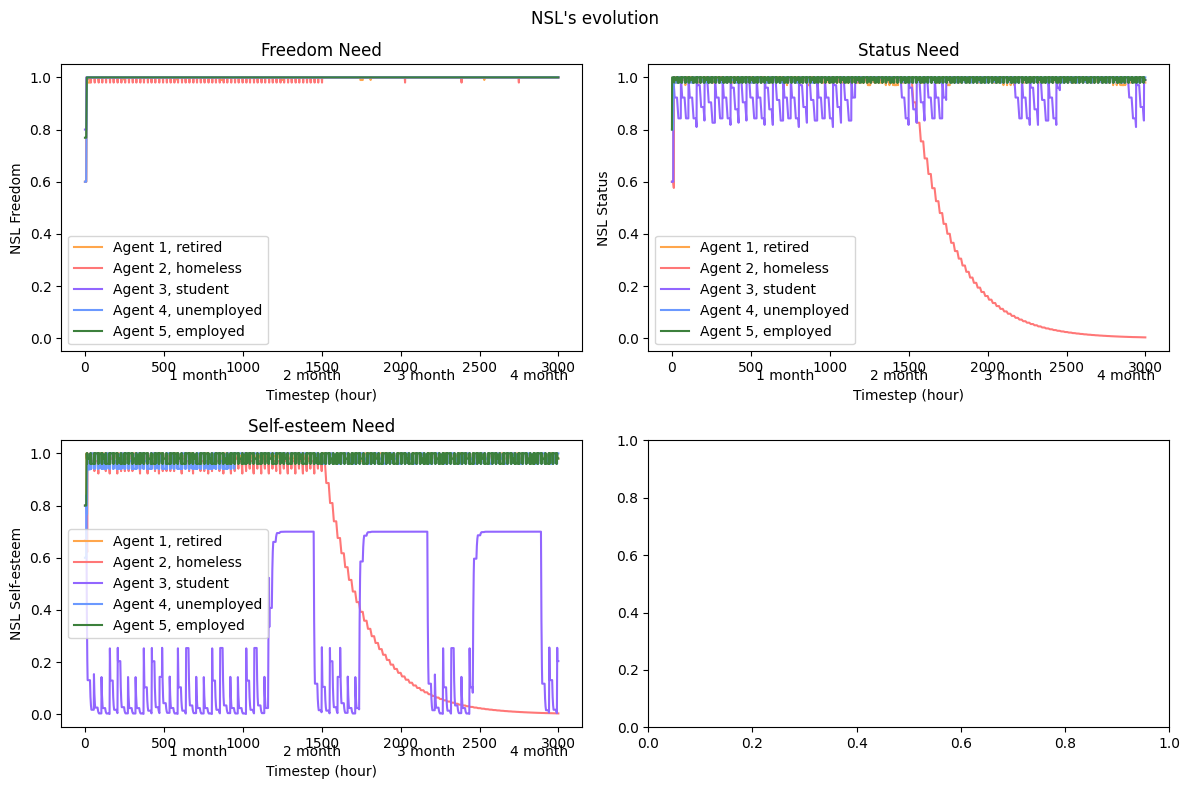

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
nsl_wealth = pd.read_csv("C:/Users/albaa/Escriptori/MasterModelitzacio/JAE/pythonmesa/mesa/aporophobia/con_norms/nsl_wealth.csv")
#nsl_wealth = nsl_wealth.head(6000) #only 2 months
categories = ['physiological', 'safety', 'belonging', 'esteem']
N = 5

# Define the colors for each status
color_dict = {
    "retired": "#FFA64C",
    "homeless": "#FF7777",
    "employed": "#3C803C",
    "unemployed": "#6B99FF",
    "student": "#9266FF"
}

for category in categories:
    nsl_wealth[category] = nsl_wealth[category].apply(ast.literal_eval)

    # Get the corresponding needs for the category
    if category == 'physiological':
        needs = ['food', 'shelter', 'sleep', 'health']
    elif category == 'safety':
        needs = ['clothing', 'financial security', 'employment', 'education']
    elif category == 'belonging':
        needs = ['family', 'friendship', 'intimacy']
    elif category == 'esteem':
        needs = ['freedom', 'status', 'self-esteem']
    else:
        needs = []

    # Plot the evolution of the first value for each need
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    for i, need in enumerate(needs):
        row = i // 2
        col = i % 2
        ax = axs[row, col]

        # Extract the first value of each list for all agents
        first_values = nsl_wealth[category].apply(lambda x: x[i])

        # Plot the evolution of the first value for each agent
        for agent_id in range(N):
            agent_first_values = first_values[agent_id::N]  # Select values for each agent
            status = nsl_wealth["status"].iloc[agent_id]
            color = color_dict[status]  # Get the color for the status
            ax.plot(range(len(agent_first_values)), agent_first_values, label=f'Agent {agent_id+1}, {status}', color=color)

        ax.set_ylabel(f'NSL {need.capitalize()}')
        ax.set_title(f'{need.capitalize()} Need')
        ax.legend()

        # Add labels every 720 ticks (1 month)
        month_labels = range(1, len(agent_first_values) // 720 + 1)
        for tick_pos, month_label in zip(range(720, len(agent_first_values), 720), month_labels):
            ax.text(tick_pos, -0.1, f'{month_label} month', transform=ax.get_xaxis_transform(), ha='center', va='baseline')

        ax.set_xlabel("Timestep (hour)", labelpad=10)
        ax.set_ylim(-0.05, 1.05)
    fig.suptitle('NSL\'s evolution')
    plt.tight_layout()
    plt.show()


Now let's visualize the distributions of Executed Actions in general, differentiating between the first and second half of timesteps and by status. 

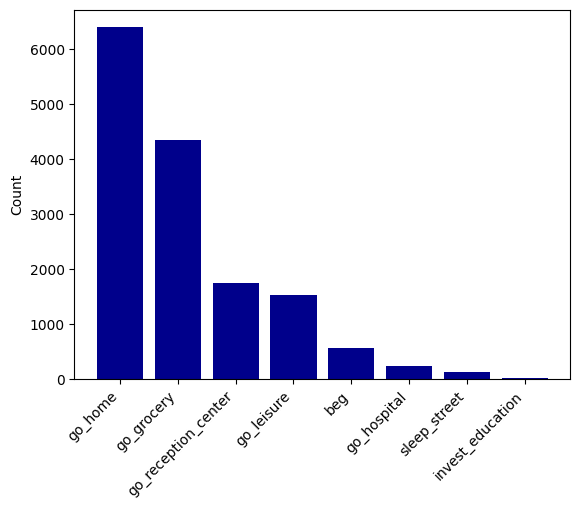

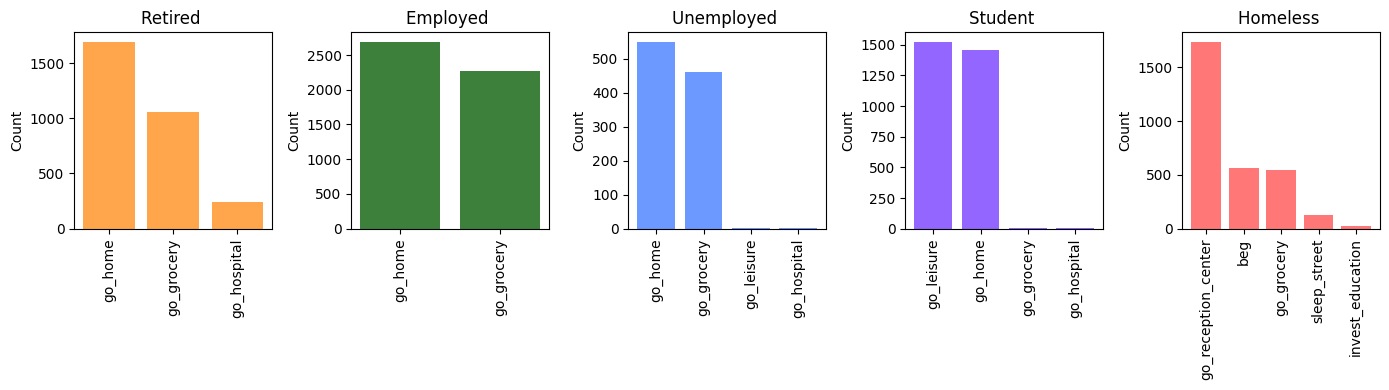

In [23]:
nsl_wealth = pd.read_csv("C:/Users/albaa/Escriptori/MasterModelitzacio/JAE/pythonmesa/mesa/aporophobia/con_norms/nsl_wealth.csv")
nsl_wealth = nsl_wealth.dropna(subset=["actions"])
action_counts = nsl_wealth["actions"].value_counts()
plt.bar(action_counts.index, action_counts.values, color= 'darkblue')
#plt.xlabel("Actions")
plt.ylabel("Count")
#plt.title("Distribution of Actions")
plt.xticks(rotation=45, ha='right')
plt.show()

# DISTRIBUTION OF ACTIONS BY STATUS
statuses = ['retired', 'employed', 'unemployed', 'student', 'homeless']
colors = ['#FFA64C', '#3C803C', '#6B99FF', '#9266FF', '#FF7777']
fig, axes = plt.subplots(1, 5, figsize=(14, 4))

for i, status in enumerate(statuses):
    action_counts = nsl_wealth["actions"][nsl_wealth["status"] == status].value_counts()

    axes[i].bar(action_counts.index, action_counts.values, color=colors[i])
    #axes[i].set_xlabel("Actions")
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"{status.capitalize()} ")
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
#plt.title("Distribution of Actions for status")
plt.show()


We can locate certain actions to see if they are being performed for a certain status using the lines below. 

In [211]:
nsl_wealth.loc[nsl_wealth['actions']=='go_leisure']
nsl_wealth.loc[nsl_wealth['status']=='retired']['actions'].unique()
nsl_wealth[-nsl_wealth['actions'].isin(["go_home", "go_grocery"])]['actions'].unique()

array([nan, 'go_home', 'go_grocery'], dtype=object)

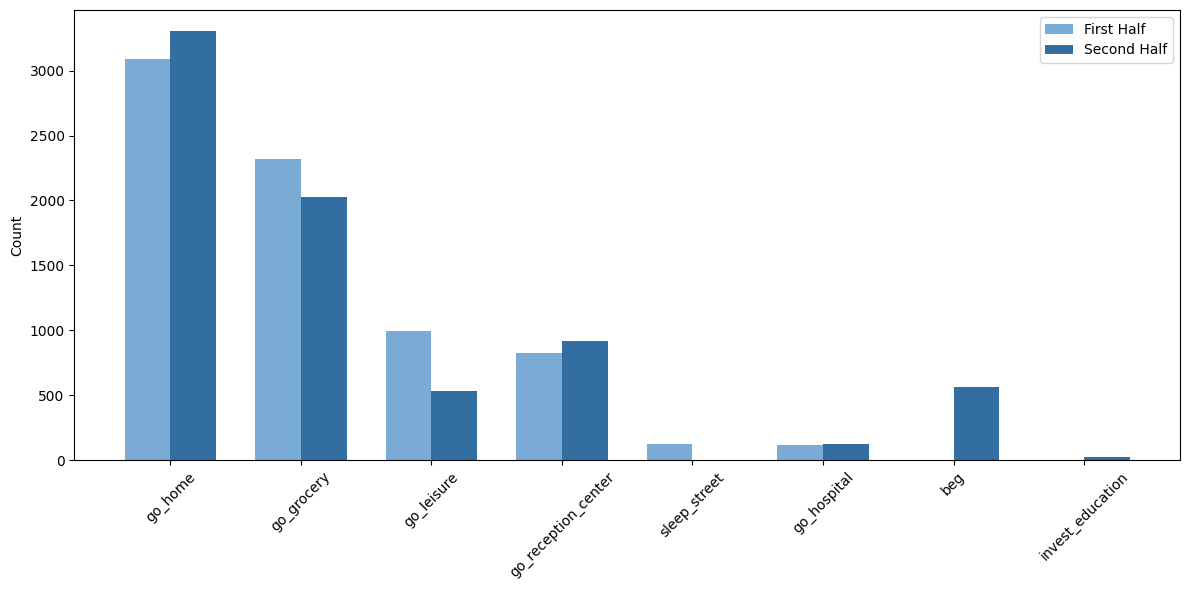

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

nsl_wealth = pd.read_csv("C:/Users/albaa/Escriptori/MasterModelitzacio/JAE/pythonmesa/mesa/aporophobia/con_norms/nsl_wealth.csv")
nsl_wealth = nsl_wealth.dropna(subset=["actions"])

# Split the actions into two subsets
total_actions = len(nsl_wealth)
half_actions = total_actions // 2

first_half_actions = nsl_wealth["actions"].iloc[:half_actions]
second_half_actions = nsl_wealth["actions"].iloc[half_actions:]

# Define the desired order of appearance for actions
custom_order = ['go_home', 'go_grocery', 'go_leisure', 'go_reception_center', 'sleep_street', 'go_hospital', 'beg', 'invest_education']  # Update with your desired order

# Get unique actions from both halves
unique_actions = np.union1d(first_half_actions.unique(), second_half_actions.unique())

# Sort unique actions based on the custom order
unique_actions = sorted(unique_actions, key=lambda x: custom_order.index(x) if x in custom_order else float('inf'))

# Calculate frequencies for each half
first_half_freq = first_half_actions.value_counts().reindex(unique_actions, fill_value=0)
second_half_freq = second_half_actions.value_counts().reindex(unique_actions, fill_value=0)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(unique_actions))

# Plot for the first half of actions
ax.bar(index, first_half_freq, bar_width, color='#7aabd4', label='First Half')

# Plot for the second half of actions
ax.bar(index + bar_width, second_half_freq, bar_width, color='#336ea0', label='Second Half')

ax.set_ylabel("Count")
#ax.set_title("Distribution of Actions (First Half vs Second Half)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(unique_actions, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


Finally, the wealth evolution can be obtained. 

C:\Users\albaa\AppData\Local\Temp\ipykernel_14032\2685357715.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  agent_values = nsl_wealth['wealth'][agent_id::N]  # Select values for each agent


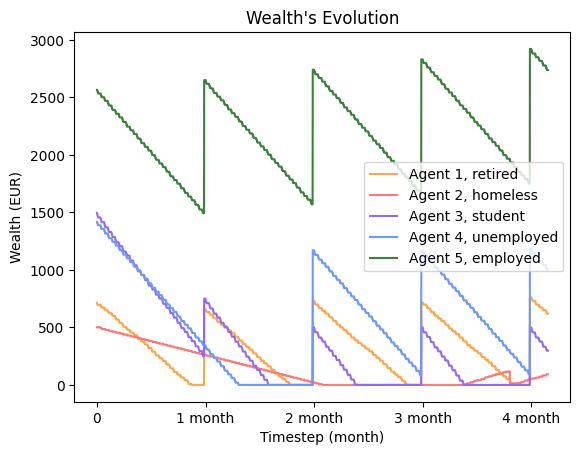

In [6]:
import matplotlib.pyplot as plt

# Define the colors for each status
color_dict = {
    "retired": "#FFA64C",
    "homeless": "#FF7777",
    "employed": "#3C803C",
    "unemployed": "#6B99FF",
    "student": "#9266FF"
}

for agent_id in range(0, N):
    agent_values = nsl_wealth['wealth'][agent_id::N]  # Select values for each agent
    status = nsl_wealth["status"].iloc[agent_id]  # Get the status of the agent
    color = color_dict.get(status, "black")  # Get the color corresponding to the status, default to black if not found
    plt.plot(range(len(agent_values)), agent_values, label=f'Agent {agent_id+1}, {status}', color=color)

plt.xlabel("Timestep (month)")
plt.ylabel("Wealth (EUR)")
plt.title("Wealth's Evolution")
plt.legend()

# Set custom x-tick positions
tick_positions = [720 * i for i in range(len(agent_values) // 720 + 1)]
plt.xticks(tick_positions)

# Set custom x-tick labels
tick_labels = ['0'] + [f'{i} month' for i in range(1, len(agent_values) // 720 + 1)]
plt.gca().set_xticklabels(tick_labels)

plt.show()


It is useful to add a trend line, computed with a linear regression, to check if there wealth has a positive, stable or negative rate.

C:\Users\albaa\AppData\Local\Temp\ipykernel_14032\371588251.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  agent_values = nsl_wealth['wealth'][agent_id::N]  # Select values for each agent


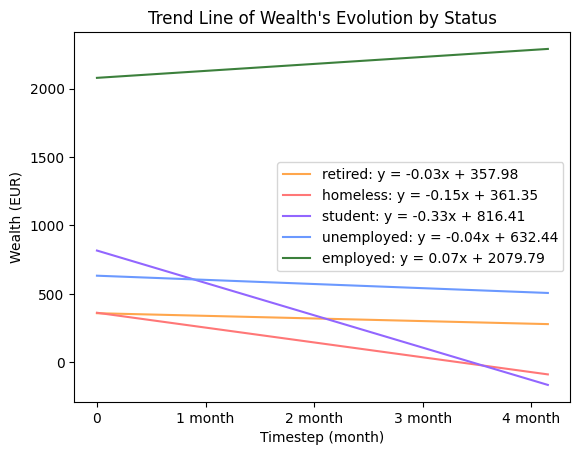

In [8]:
# Define the colors for each status
import numpy as np
color_dict = {
    "retired": "#FFA64C",
    "homeless": "#FF7777",
    "employed": "#3C803C",
    "unemployed": "#6B99FF",
    "student": "#9266FF"
}

for agent_id in range(0, N):
    agent_values = nsl_wealth['wealth'][agent_id::N]  # Select values for each agent
    status = nsl_wealth["status"].iloc[agent_id]  # Get the status of the agent
    color = color_dict.get(status, "black")  # Get the color corresponding to the status, default to black if not found

    # Calculate the trend line using a linear regression
    trend = np.polyfit(range(len(agent_values)), agent_values, deg=1)
    trend_line = np.polyval(trend, range(len(agent_values)))
    
    # Plot the trend line for each status
    plt.plot(range(len(agent_values)), trend_line, label=f'{status}: y = {trend[0]:.2f}x + {trend[1]:.2f}', color=color)

plt.xlabel("Timestep (month)")
plt.ylabel("Wealth (EUR)")
plt.title("Trend Line of Wealth's Evolution by Status")
plt.legend()

# Set custom x-tick positions
tick_positions = [720 * i for i in range(len(agent_values) // 720 + 1)]
plt.xticks(tick_positions)

# Set custom x-tick labels
tick_labels = ['0'] + [f'{i} month' for i in range(1, len(agent_values) // 720 + 1)]
plt.gca().set_xticklabels(tick_labels)

plt.show()
